In [188]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df = pd.read_excel('Estados.xlsx')

In [100]:
base = df.drop(['Unnamed: 0','Municipio'], axis=1)

In [101]:
base['cumsum_col'] = base.groupby(['Año', 'Estado'])['Indice'].cumsum()

In [102]:
base

,Año,Trimestre,Estado,Indice,Q,cumsum_col
0,2005,1,Aguascalientes,47.12,1Q2005,47.12
1,2005,2,Aguascalientes,48.97,2Q2005,96.09
2,2005,3,Aguascalientes,50.25,3Q2005,146.34
3,2005,4,Aguascalientes,50.26,4Q2005,196.60
4,2006,1,Aguascalientes,51.04,1Q2006,51.04
...,...,...,...,...,...,...
2363,2022,2,Zacatecas,136.29,2Q2022,269.11
2364,2022,3,Zacatecas,140.69,3Q2022,409.80
2365,2022,4,Zacatecas,144.64,4Q2022,554.44
2366,2023,1,Zacatecas,148.37,1Q2023,148.37


In [103]:
base['cumcount_col'] = base.groupby(['Año', 'Estado'])['Indice'].cumcount()

In [104]:
base

,Año,Trimestre,Estado,Indice,Q,cumsum_col,cumcount_col
0,2005,1,Aguascalientes,47.12,1Q2005,47.12,0
1,2005,2,Aguascalientes,48.97,2Q2005,96.09,1
2,2005,3,Aguascalientes,50.25,3Q2005,146.34,2
3,2005,4,Aguascalientes,50.26,4Q2005,196.60,3
4,2006,1,Aguascalientes,51.04,1Q2006,51.04,0
...,...,...,...,...,...,...,...
2363,2022,2,Zacatecas,136.29,2Q2022,269.11,1
2364,2022,3,Zacatecas,140.69,3Q2022,409.80,2
2365,2022,4,Zacatecas,144.64,4Q2022,554.44,3
2366,2023,1,Zacatecas,148.37,1Q2023,148.37,0


In [105]:
base['cummean_col'] = (base['cumsum_col'] / (base['cumcount_col']+1))

In [106]:
base

,Año,Trimestre,Estado,Indice,Q,cumsum_col,cumcount_col,cummean_col
0,2005,1,Aguascalientes,47.12,1Q2005,47.12,0,47.120
1,2005,2,Aguascalientes,48.97,2Q2005,96.09,1,48.045
2,2005,3,Aguascalientes,50.25,3Q2005,146.34,2,48.780
3,2005,4,Aguascalientes,50.26,4Q2005,196.60,3,49.150
4,2006,1,Aguascalientes,51.04,1Q2006,51.04,0,51.040
...,...,...,...,...,...,...,...,...
2363,2022,2,Zacatecas,136.29,2Q2022,269.11,1,134.555
2364,2022,3,Zacatecas,140.69,3Q2022,409.80,2,136.600
2365,2022,4,Zacatecas,144.64,4Q2022,554.44,3,138.610
2366,2023,1,Zacatecas,148.37,1Q2023,148.37,0,148.370


In [107]:
base['incremento_anual'] = (base['cummean_col'].pct_change(periods=4))*100

In [108]:
base

,Año,Trimestre,Estado,Indice,Q,cumsum_col,cumcount_col,cummean_col,incremento_anual
0,2005,1,Aguascalientes,47.12,1Q2005,47.12,0,47.120,NaN
1,2005,2,Aguascalientes,48.97,2Q2005,96.09,1,48.045,NaN
2,2005,3,Aguascalientes,50.25,3Q2005,146.34,2,48.780,NaN
3,2005,4,Aguascalientes,50.26,4Q2005,196.60,3,49.150,NaN
4,2006,1,Aguascalientes,51.04,1Q2006,51.04,0,51.040,8.319185
...,...,...,...,...,...,...,...,...,...
2363,2022,2,Zacatecas,136.29,2Q2022,269.11,1,134.555,4.484392
2364,2022,3,Zacatecas,140.69,3Q2022,409.80,2,136.600,5.683928
2365,2022,4,Zacatecas,144.64,4Q2022,554.44,3,138.610,6.999633
2366,2023,1,Zacatecas,148.37,1Q2023,148.37,0,148.370,11.707574


In [109]:
criterio1 = base[(base['Año']<2023) & (base['Trimestre']==4)]
criterio2 = base[(base['Año']==2023) & (base['Trimestre']==2)]

In [110]:
baseEstados =pd.concat([criterio1, criterio2])

In [111]:
baseEstados = baseEstados.dropna()

In [112]:
baseEstados = baseEstados.drop(['cumsum_col','cumcount_col','cummean_col'], axis=1)

In [113]:
baseEstados

,Año,Trimestre,Estado,Indice,Q,incremento_anual
7,2006,4,Aguascalientes,53.82,4Q2006,7.405900
11,2007,4,Aguascalientes,57.46,4Q2007,6.445349
15,2008,4,Aguascalientes,63.75,4Q2008,8.186146
19,2009,4,Aguascalientes,66.14,4Q2009,8.356294
23,2010,4,Aguascalientes,68.84,4Q2010,2.888155
...,...,...,...,...,...,...
2071,2023,2,Tamaulipas,154.43,2Q2023,11.277539
2145,2023,2,Tlaxcala,144.48,2Q2023,8.445997
2219,2023,2,Veracruz,156.25,2Q2023,11.410072
2293,2023,2,Yucatán,163.58,2Q2023,11.492826


In [114]:
base2023 = baseEstados[baseEstados['Año']==2023]

In [116]:
base2023 = base2023.sort_values(['incremento_anual'], ascending=False)

In [117]:
base2023 = base2023.reset_index()

In [148]:
base2023['Nacional'] = 11.604800055977304

In [149]:
base2023

,index,Año,Trimestre,Estado,Indice,Q,incremento_anual,Nacional
0,221,2023,2,Baja California Sur,189.96,2Q2023,18.055247,11.6048
1,1701,2023,2,Quintana Roo,188.31,2Q2023,16.795001,11.6048
2,1849,2023,2,Sinaloa,180.37,2Q2023,15.953079,11.6048
3,147,2023,2,Baja California,176.90,2Q2023,14.886476,11.6048
4,887,2023,2,Guerrero,164.76,2Q2023,14.845761,11.6048
5,1331,2023,2,Nayarit,181.90,2Q2023,14.840468,11.6048
6,591,2023,2,Coahuila,163.20,2Q2023,13.728329,11.6048
7,1627,2023,2,Querétaro,161.50,2Q2023,13.524048,11.6048
8,517,2023,2,Ciudad de México,153.79,2Q2023,13.079039,11.6048
9,1035,2023,2,Jalisco,175.23,2Q2023,12.554830,11.6048


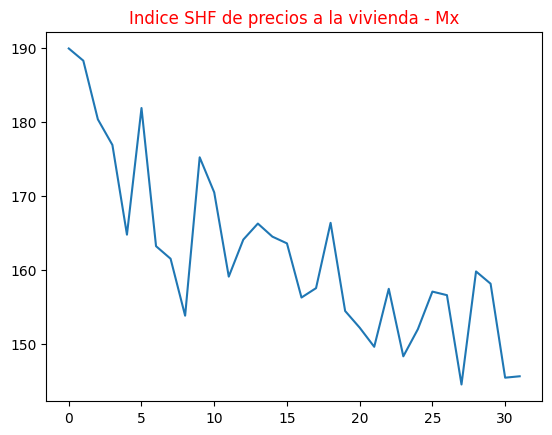

In [180]:
plt.plot(base2023['Indice'])
plt.title('Indice SHF de precios a la vivienda - Mx', fontsize= 12, color='red')
plt.show()

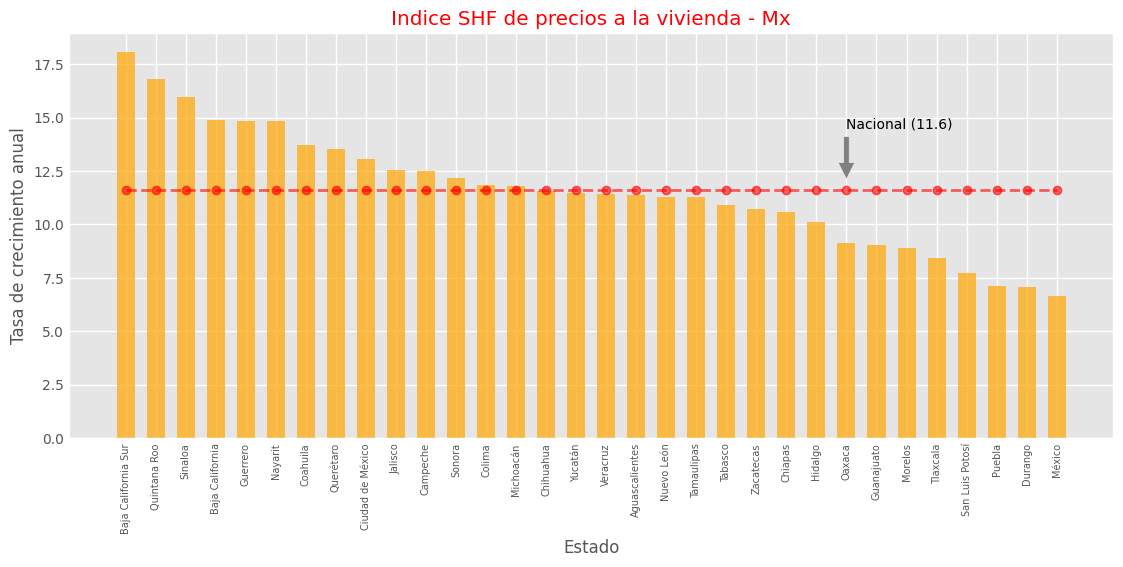

In [197]:
from sqlalchemy import false
fig2, ax2 = plt.subplots(figsize=(12,5))

plt.style.use('ggplot')

ax2.bar(base2023['Estado'] , base2023['incremento_anual'], color= 'orange', width= 0.6, alpha=0.7)

ax2.plot(base2023['Nacional'], color='red', marker='o', linestyle='dashed', alpha=0.6,linewidth=2)

ax2.set_ylabel('Tasa de crecimiento anual')
ax2.set_title('Indice SHF de precios a la vivienda - Mx', color='red')
ax2.set_xlabel('Estado')

ax2.grid(True)

ax2.annotate('Nacional (11.6)', xy=('Oaxaca',12),xytext=('Oaxaca', 14.5),arrowprops=dict(facecolor='gray', shrink=0.05))

plt.xticks(fontsize=7, rotation=90)

plt.show()